In [135]:
#import dependencies 
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [136]:
data_df=pd.read_csv("Data/HappinessAlcoholConsumption.csv")
data_df.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


In [137]:
data_df.dropna()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97
...,...,...,...,...,...,...,...,...,...
117,Tanzania,Sub-Saharan Africa,south,3.666,533,878.000,36,6,1
118,Liberia,Sub-Saharan Africa,north,3.622,432,455.000,19,152,2
119,Benin,Sub-Saharan Africa,north,3.484,512,789.000,34,4,13
120,Togo,Sub-Saharan Africa,north,3.303,500,577.000,36,2,19


In [138]:
#shape of dataframe
data_df.shape

(122, 9)

In [139]:
#unique regions
data_df["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa'], dtype=object)

In [116]:
#unique countries
data_df["Country"].unique()

array(['Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada',
       'Netherlands', 'New Zealand', 'Australia', 'Sweden', 'Israel',
       'Austria', 'United States', 'Costa Rica', 'Germany', 'Brazil',
       'Belgium', 'Ireland', 'Luxembourg', 'Mexico', 'Singapore',
       'United Kingdom', 'Chile', 'Panama', 'Argentina', 'Czech Republic',
       'United Arab Emirates', 'Uruguay', 'Malta', 'Colombia', 'France',
       'Thailand', 'Qatar', 'Spain', 'Guatemala', 'Suriname', 'Bahrain',
       'Trinidad and Tobago', 'Venezuela', 'Slovakia', 'El Salvador',
       'Nicaragua', 'Uzbekistan', 'Italy', 'Ecuador', 'Belize', 'Japan',
       'Kazakhstan', 'Moldova', 'Russian Federation', 'Poland',
       'South Korea', 'Bolivia', 'Lithuania', 'Belarus', 'Slovenia',
       'Peru', 'Turkmenistan', 'Mauritius', 'Latvia', 'Cyprus',
       'Paraguay', 'Romania', 'Estonia', 'Jamaica', 'Croatia', 'Turkey',
       'Jordan', 'Azerbaijan', 'Philippines', 'China', 'Kyrgyzstan',
       'Serbia',

In [140]:
data_df.columns

Index(['Country', 'Region', 'Hemisphere', 'HappinessScore', 'HDI',
       'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita',
       'Wine_PerCapita'],
      dtype='object')

In [141]:
#importing Population Data
population_df=pd.read_csv("Data/Population Data/Global Population Trends(2016-2022).csv")
population_df.head()
# population_df.dropna

,Country,Year,Total Population,Urban Population,Rural Population,Population Density,Life Expectancy,Birth Rate,Death Rate,Fertility Rate,Infant Mortality Rate,Growth Rate
0,Afghanistan,2017,-,-,-,55,63.0,37.342,7.027,5.129,49.4,-
1,Afghanistan,2018,"36,686,784","9,353,296","27,333,488",56,63.0,36.927,6.981,5.002,47.8,3.0
2,Afghanistan,2019,"37,769,499","9,727,157","28,042,342",58,64.0,36.466,6.791,4.87,46.3,3.0
3,Afghanistan,2020,"38,972,230","10,142,913","28,829,317",60,63.0,36.051,7.113,4.75,44.8,3.0
4,Afghanistan,2021,"40,099,462","10,551,772","29,547,690",-,62.0,35.842,7.344,4.643,43.4,3.0


In [154]:
#we only want the data from the following countries
selected_countries={"Country":['Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada',
       'Netherlands', 'New Zealand', 'Australia', 'Sweden', 'Israel',
       'Austria', 'United States', 'Costa Rica', 'Germany', 'Brazil',
       'Belgium', 'Ireland', 'Luxembourg', 'Mexico', 'Singapore',
       'United Kingdom', 'Chile', 'Panama', 'Argentina', 'Czech Republic',
       'United Arab Emirates', 'Uruguay', 'Malta', 'Colombia', 'France',
       'Thailand', 'Qatar', 'Spain', 'Guatemala', 'Suriname', 'Bahrain',
       'Trinidad and Tobago', 'Venezuela', 'Slovakia', 'El Salvador',
       'Nicaragua', 'Uzbekistan', 'Italy', 'Ecuador', 'Belize', 'Japan',
       'Kazakhstan', 'Moldova', 'Russian Federation', 'Poland',
       'South Korea', 'Bolivia', 'Lithuania', 'Belarus', 'Slovenia',
       'Peru', 'Turkmenistan', 'Mauritius', 'Latvia', 'Cyprus',
       'Paraguay', 'Romania', 'Estonia', 'Jamaica', 'Croatia', 'Turkey',
       'Jordan', 'Azerbaijan', 'Philippines', 'China', 'Kyrgyzstan',
       'Serbia', 'Bosnia and Herzegovina', 'Montenegro',
       'Dominican Republic', 'Morocco', 'Hungary', 'Lebanon', 'Portugal',
       'Macedonia', 'Vietnam', 'Tunisia', 'Greece', 'Mongolia', 'Nigeria',
       'Honduras', 'Zambia', 'Albania', 'Sierra Leone', 'Namibia',
       'Cameroon', 'South Africa', 'Egypt', 'Armenia', 'Kenya', 'Ukraine',
       'Ghana', 'Dem. Rep. Congo', 'Georgia', 'Rep. Congo', 'Senegal',
       'Bulgaria', 'Zimbabwe', 'Malawi', 'Gabon', 'Mali', 'Haiti',
       'Botswana', 'Comoros', "Cote d'Ivoire", 'Cambodia', 'Angola',
       'Niger', 'Chad', 'Burkina Faso', 'Madagascar', 'Tanzania',
       'Liberia', 'Benin', 'Togo', 'Syria']}
filtered_pop_df = population_df[(population_df['Year'] == 2017) & (population_df['Country'].isin(selected_countries))][['Country', 'Total Population']]
filtered_pop_df.head()

,Country,Total Population


In [143]:
#Analysing GDP
gdp_df=data_df[["Country","Region","GDP_PerCapita"]].copy()
gdp_df

,Country,Region,GDP_PerCapita
0,Denmark,Western Europe,53.579
1,Switzerland,Western Europe,79.866
2,Iceland,Western Europe,60.530
3,Norway,Western Europe,70.890
4,Finland,Western Europe,43.433
...,...,...,...
117,Tanzania,Sub-Saharan Africa,878.000
118,Liberia,Sub-Saharan Africa,455.000
119,Benin,Sub-Saharan Africa,789.000
120,Togo,Sub-Saharan Africa,577.000


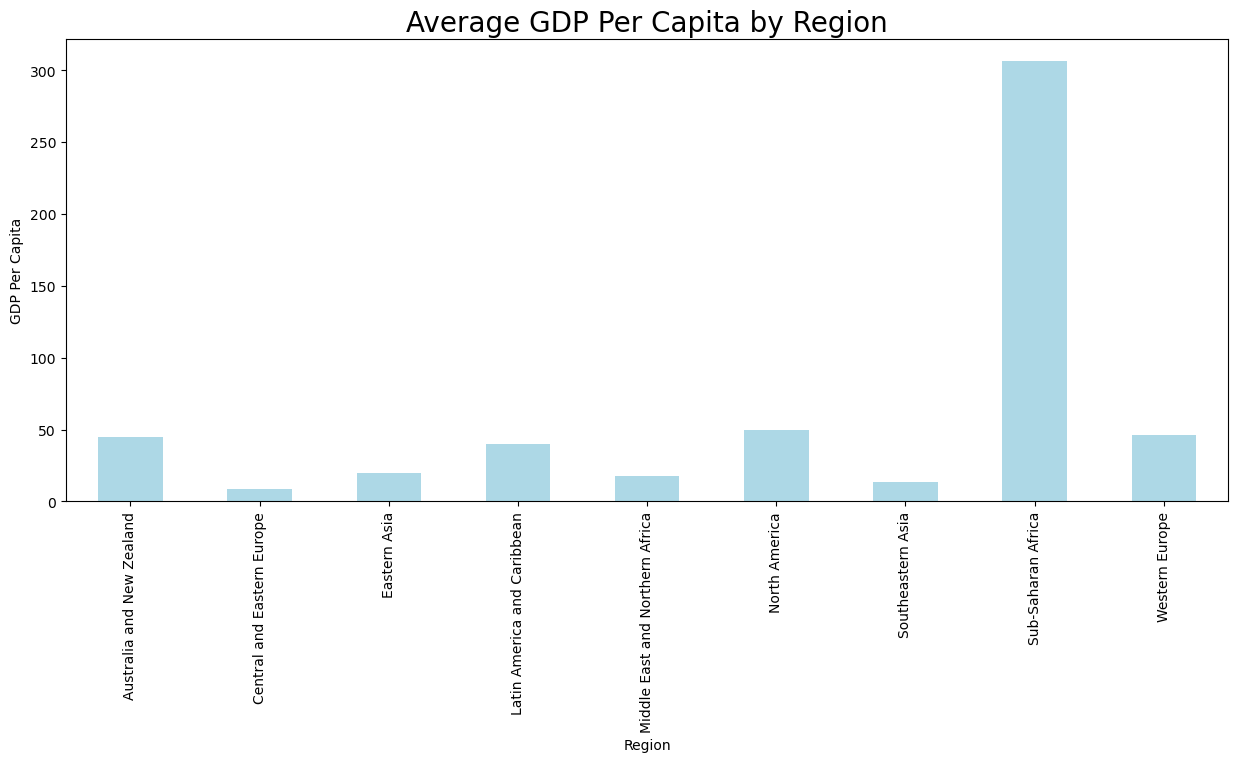

In [144]:
#Average GDP by Region
plt.figure(figsize=(15, 6))
gdp_df.groupby('Region')['GDP_PerCapita'].mean().plot(kind='bar', color='lightblue')
plt.title('Average GDP Per Capita by Region', fontsize=20)
plt.xlabel('Region')
plt.ylabel('GDP Per Capita')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'GDP Per Capita')

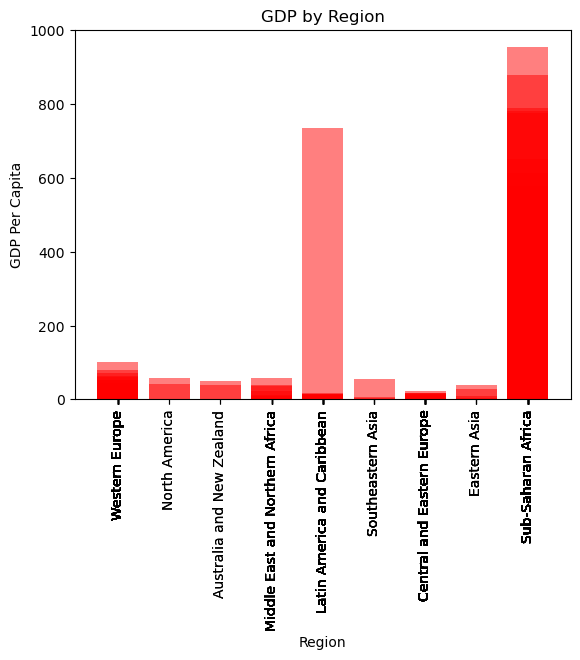

In [97]:
#chart for GDP by Region
gdp=gdp_df["GDP_PerCapita"]
region=gdp_df["Region"]

plt.bar(region,gdp,color="r",alpha=0.5,align="center")
tick_loactions=[value for value in region]
plt.xticks(tick_loactions,region,rotation=90)

plt.title("GDP by Region")
plt.xlabel("Region")
plt.ylabel("GDP Per Capita")


In [112]:
#top 20 GDP countries
gdp=gdp_df.sort_values(["GDP_PerCapita"],ascending=False)
gdp.head(25)

,Country,Region,GDP_PerCapita
101,Senegal,Sub-Saharan Africa,953.000
117,Tanzania,Sub-Saharan Africa,878.000
119,Benin,Sub-Saharan Africa,789.000
106,Mali,Sub-Saharan Africa,780.000
109,Comoros,Sub-Saharan Africa,775.000
107,Haiti,Latin America and Caribbean,735.000
114,Chad,Sub-Saharan Africa,651.000
115,Burkina Faso,Sub-Saharan Africa,614.000
120,Togo,Sub-Saharan Africa,577.000
100,Rep. Congo,Sub-Saharan Africa,498.000


<Figure size 1500x1000 with 0 Axes>

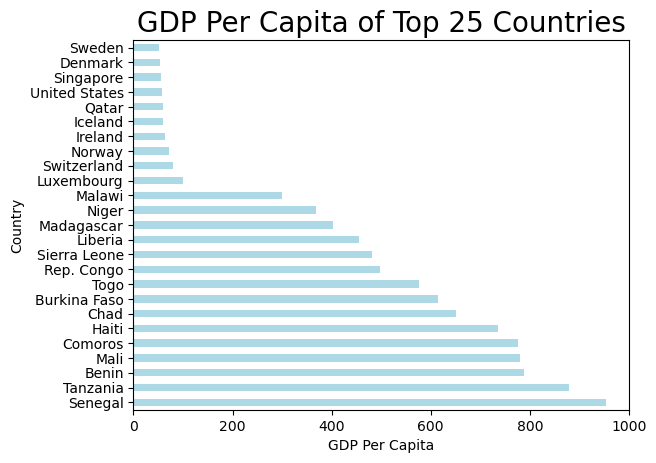

In [90]:
#chart top 25 countries by GDP
gdp=gdp_df["GDP_PerCapita"]
country=gdp_df["Country"]

plt.figure(figsize=(15, 10))
top_25_countries = gdp_df.nlargest(25, 'GDP_PerCapita')
top_25_countries.plot(kind='barh', x='Country', y='GDP_PerCapita', color='lightblue', legend=False)
plt.title('GDP Per Capita of Top 25 Countries', fontsize=20)
plt.xlabel('GDP Per Capita')
plt.ylabel('Country')
plt.show()


In [113]:
#bottom 20 GDP countries
gdp=gdp_df.sort_values(["GDP_PerCapita"],ascending=True)
gdp.head(25)

,Country,Region,GDP_PerCapita
103,Zimbabwe,Sub-Saharan Africa,1.029
71,Kyrgyzstan,Central and Eastern Europe,1.220
87,Zambia,Sub-Saharan Africa,1.263
111,Cambodia,Southeastern Asia,1.270
91,Cameroon,Sub-Saharan Africa,1.375
95,Kenya,Sub-Saharan Africa,1.463
97,Ghana,Sub-Saharan Africa,1.517
110,Cote d'Ivoire,Sub-Saharan Africa,1.535
98,Dem. Rep. Congo,Sub-Saharan Africa,1.712
48,Moldova,Central and Eastern Europe,1.913


<Figure size 1500x1000 with 0 Axes>

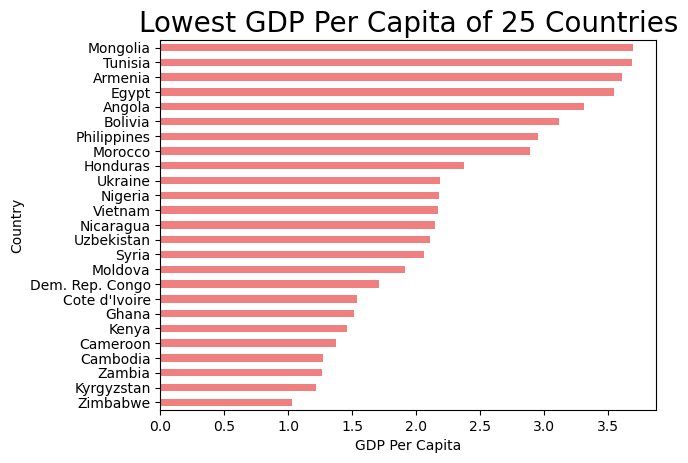

In [99]:
#Bottom 25 countries by GDP
plt.figure(figsize=(15, 10))
smallest_25_countries = gdp_df.nsmallest(25, 'GDP_PerCapita')
smallest_25_countries.plot(kind='barh', x='Country', y='GDP_PerCapita', color='lightcoral', legend=False)
plt.title('Lowest GDP Per Capita of 25 Countries', fontsize=20)
plt.xlabel('GDP Per Capita')
plt.ylabel('Country')
plt.show()

In [105]:
#Analysing for HDI by Region
hdi_df=data_df[["Country","Region","HDI"]].copy()
hdi_df


,Country,Region,HDI
0,Denmark,Western Europe,928
1,Switzerland,Western Europe,943
2,Iceland,Western Europe,933
3,Norway,Western Europe,951
4,Finland,Western Europe,918
...,...,...,...
117,Tanzania,Sub-Saharan Africa,533
118,Liberia,Sub-Saharan Africa,432
119,Benin,Sub-Saharan Africa,512
120,Togo,Sub-Saharan Africa,500


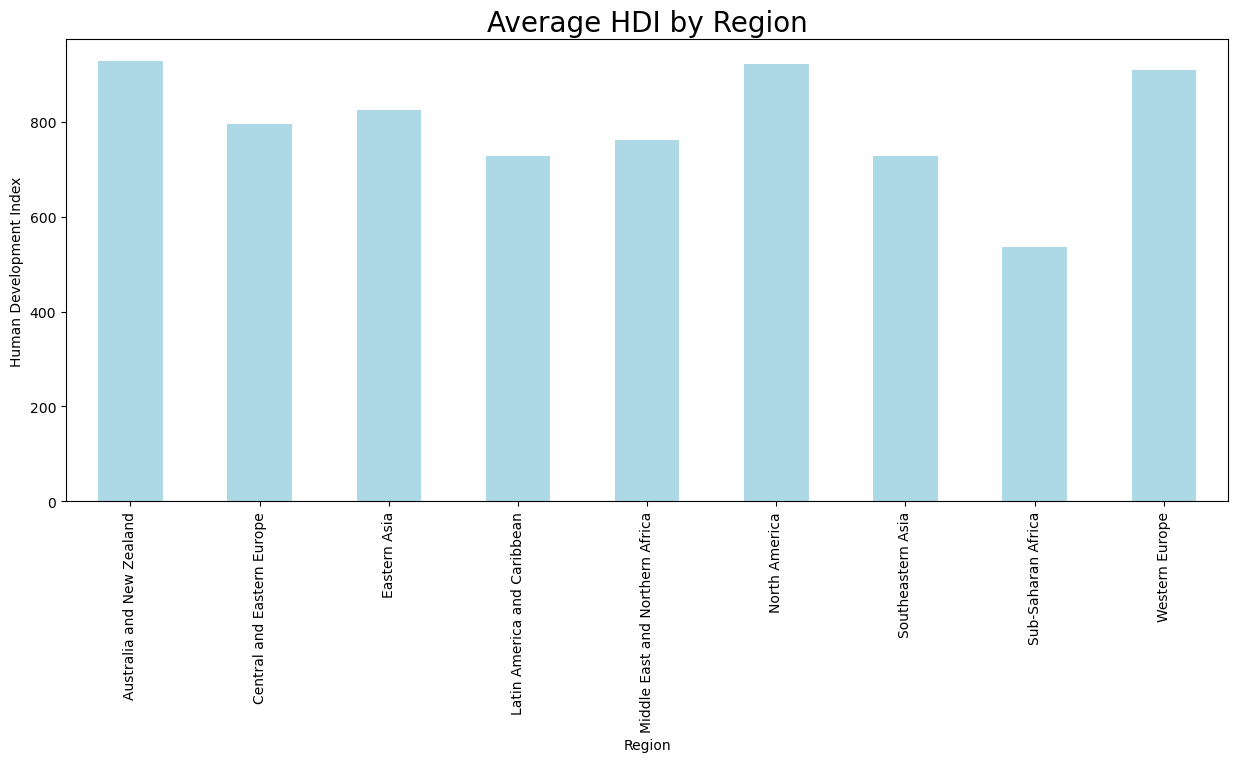

In [107]:
#average HDI per region
plt.figure(figsize=(15, 6))
hdi_df.groupby('Region')['HDI'].mean().plot(kind='bar', color='lightblue')
plt.title('Average HDI by Region', fontsize=20)
plt.xlabel('Region')
plt.ylabel('Human Development Index')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Human Development Index')

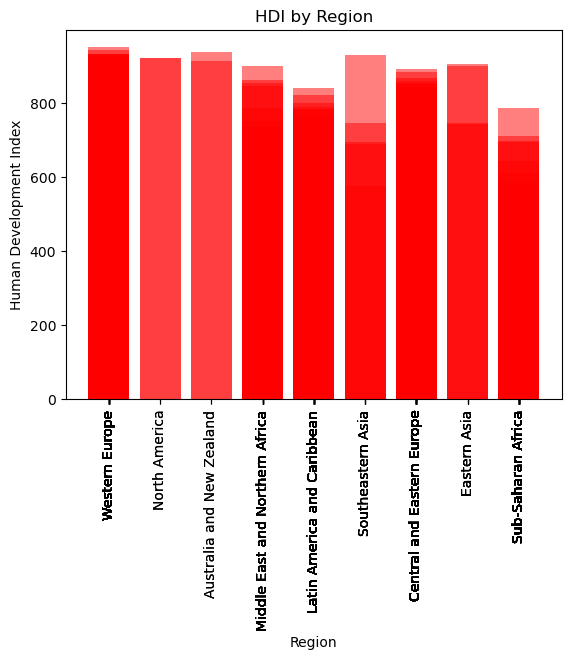

In [108]:
#HDI per region
hdi=hdi_df["HDI"]
region=gdp_df["Region"]

plt.bar(region,hdi,color="r",alpha=0.5,align="center")
tick_loactions=[value for value in region]
plt.xticks(tick_loactions,region,rotation=90)

plt.title("HDI by Region")
plt.xlabel("Region")
plt.ylabel("Human Development Index")

In [109]:
#Top 25 HDI Countries
hdi=hdi_df.sort_values(["HDI"],ascending=False)
hdi.head(25)

,Country,Region,HDI
3,Norway,Western Europe,951
1,Switzerland,Western Europe,943
8,Australia,Australia and New Zealand,938
14,Germany,Western Europe,934
17,Ireland,Western Europe,934
2,Iceland,Western Europe,933
9,Sweden,Western Europe,932
20,Singapore,Southeastern Asia,930
0,Denmark,Western Europe,928
6,Netherlands,Western Europe,928


<Figure size 1500x1000 with 0 Axes>

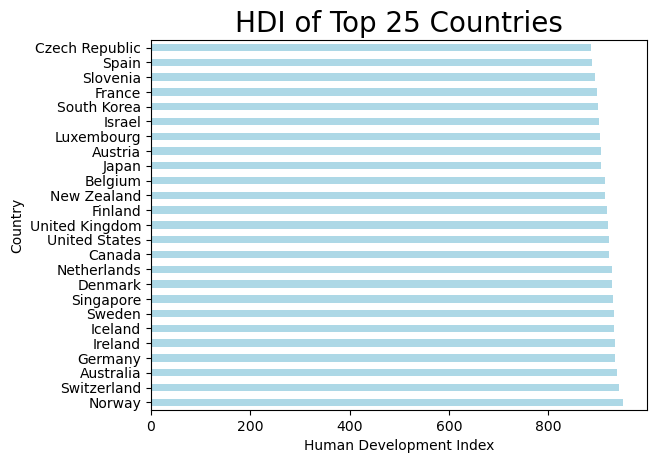

In [111]:
#Top 25 HDI Countries Graph
hdi=hdi_df["HDI"]
country=hdi_df["Country"]

plt.figure(figsize=(15, 10))
top_25_countries = hdi_df.nlargest(25, 'HDI')
top_25_countries.plot(kind='barh', x='Country', y='HDI', color='lightblue', legend=False)
plt.title('HDI of Top 25 Countries', fontsize=20)
plt.xlabel('Human Development Index')
plt.ylabel('Country')
plt.show()


In [114]:
#bottom 25 HDI Countries
hdi=hdi_df.sort_values(["HDI"],ascending=True)
hdi.head(25)

,Country,Region,HDI
113,Niger,Sub-Saharan Africa,351
114,Chad,Sub-Saharan Africa,405
89,Sierra Leone,Sub-Saharan Africa,413
115,Burkina Faso,Sub-Saharan Africa,420
106,Mali,Sub-Saharan Africa,421
118,Liberia,Sub-Saharan Africa,432
98,Dem. Rep. Congo,Sub-Saharan Africa,452
104,Malawi,Sub-Saharan Africa,474
110,Cote d'Ivoire,Sub-Saharan Africa,486
107,Haiti,Latin America and Caribbean,496


<Figure size 1500x1000 with 0 Axes>

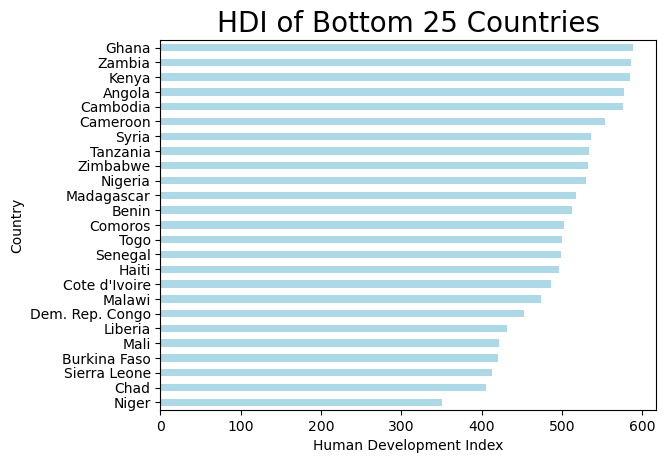

In [117]:
#bottom 25 HDI Countries
hdi=hdi_df["HDI"]
country=hdi_df["Country"]

plt.figure(figsize=(15, 10))
top_25_countries = hdi_df.nsmallest(25, 'HDI')
top_25_countries.plot(kind='barh', x='Country', y='HDI', color='lightblue', legend=False)
plt.title('HDI of Bottom 25 Countries', fontsize=20)
plt.xlabel('Human Development Index')
plt.ylabel('Country')
plt.show()
